In [4]:
import pandas as pd

In [ ]:
# Dataset Source

# https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

In [5]:
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
print('No. of Rows',df.shape[0])
print('No. of Columns',df.shape[1])


No. of Rows 10000
No. of Columns 14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False


In [18]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
sns.set_style('darkgrid')

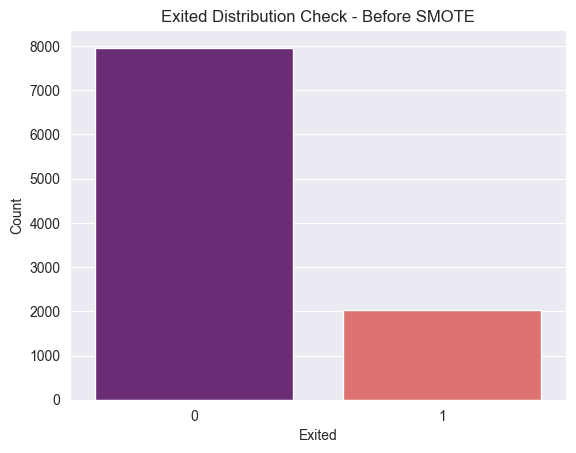

In [21]:
sns.countplot(data=df, x='Exited', palette='magma')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited Distribution Check - Before SMOTE')
plt.savefig('visuals/Class Distribution Before SMOTE.png')
plt.show()

In [22]:
X = df.drop(columns='Exited',axis=1)
y = df['Exited']

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X_sample,y_sample = SMOTE().fit_resample(X,y)

In [25]:
y_sample.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

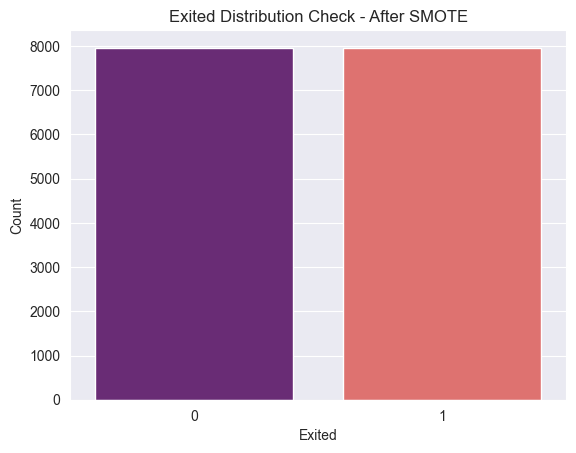

In [26]:
sns.countplot(x=y_sample, palette='magma')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited Distribution Check - After SMOTE')
plt.savefig('visuals/Class Distribution After SMOTE.png')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.20, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(units=16,activation='relu',input_dim = 11))
model.add(Dropout(0.3))

model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6175 - loss: 0.6502 - val_accuracy: 0.7378 - val_loss: 0.5588
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7037 - loss: 0.5733 - val_accuracy: 0.7586 - val_loss: 0.5063
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7501 - loss: 0.5316 - val_accuracy: 0.7677 - val_loss: 0.4802
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7543 - loss: 0.5170 - val_accuracy: 0.7692 - val_loss: 0.4725
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7644 - loss: 0.5004 - val_accuracy: 0.7735 - val_loss: 0.4628
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7725 - loss: 0.4960 - val_accuracy: 0.7822 - val_loss: 0.4581
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7749 - loss: 0.4945 - val_accuracy: 0.7896 - val_loss: 0.4511
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7823 - loss: 0.4924 - val_accu

In [31]:
y_pred_prob = model.predict(X_test_scaled)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [32]:
import numpy as np
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Test Accuracy: 0.8342749529190208
Confusion Matrix:
 [[1337  296]
 [ 232 1321]]


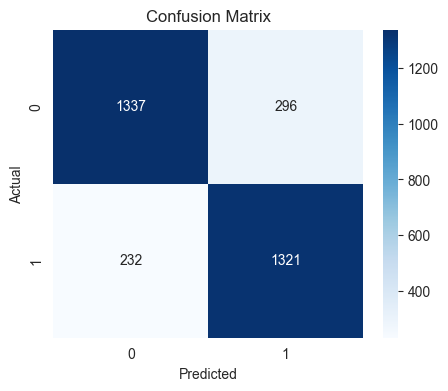

In [34]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('visuals/Churn Confusion Matrix.png')
plt.show()

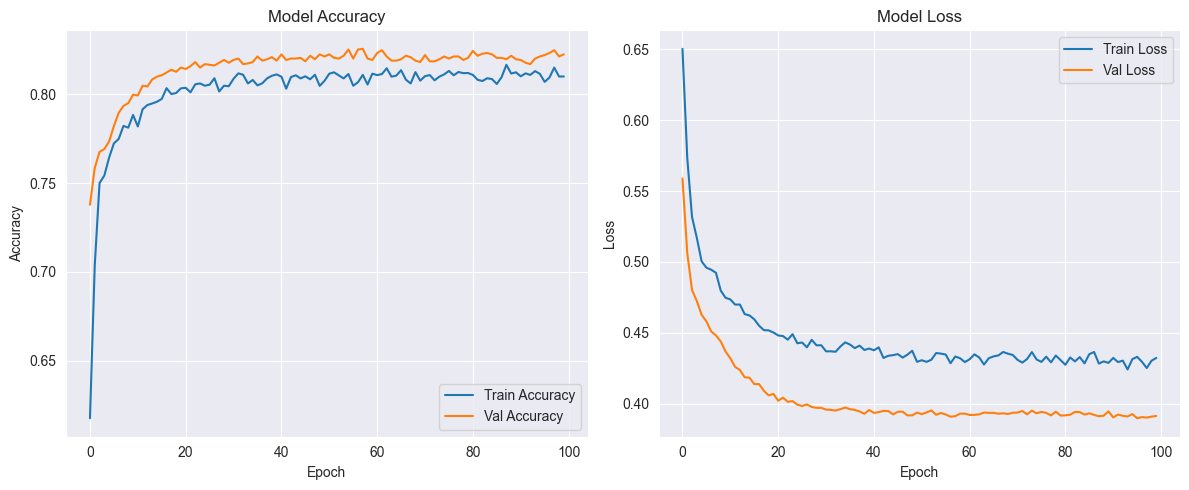

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#-------------------------------------------------------------------------

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('visuals/Model Accuracy And Loss.png')
plt.show()


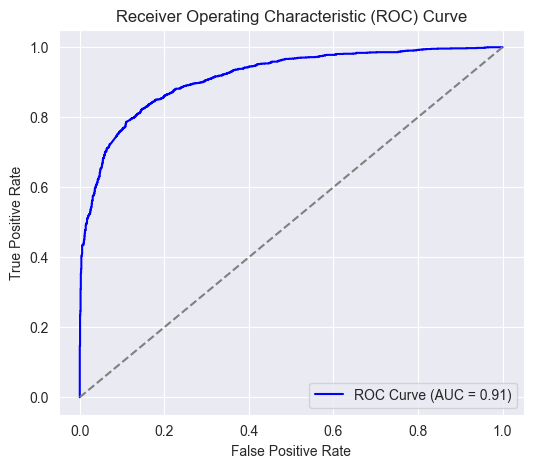

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('visuals/ROC Curve.png')
plt.show()


In [37]:
model.save("model.keras")

In [38]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)